In [303]:
import os
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [304]:

rdir="results/tres_ratio_norm"

datasets = [d for d in os.listdir(f"../{rdir}") if not d.startswith(".")]

results = []
curves = []
for part in ("train", "test"):
    for dset in datasets:
        dirs =  [d for d in os.listdir(f"../{rdir}/{dset}") if not d.startswith(".")]

        for dir in dirs:
            runs = [d for d in os.listdir(f"../{rdir}/{dset}/{dir}") if not d.startswith(".")] 
            for seed in runs:
                try:
                    exp_dir = f"../{rdir}/{dset}/{dir}/{seed}"
                    with open(f"{exp_dir}/metrics_{part}.yaml", 'r') as io:
                        metrics = yaml.safe_load(io)

                    with open(f"{exp_dir}/config.yaml", 'r') as io:
                        cfg = yaml.safe_load(io)
                    metrics['seed'] = int(seed)
                    metrics['dataset'] = dset
                    metrics['dir'] = dir
                    metrics["part"] = part
                    results.append(metrics)

                    curve = pd.read_csv(f"{exp_dir}/curve.csv")
                    curve['seed'] = int(seed)
                    curve['dir'] = dir
                    curve['dataset'] = dset
                    curve["part"] = part
                    curves.append(curve)
                except:
                    pass

results = pd.DataFrame(results)
curves = pd.concat(curves)

pd.set_option('display.max_colwidth', -1)
results.groupby(['part', 'dataset', 'dir']).mean().reset_index()

/tmp/ipykernel_123103/305152816.py:39: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,part,dataset,dir,aipw_curve_error,best_iter,best_val,gps_ratio_loss,last_saved_epoch,outcome_loss,plugin_curve_error,total_loss,tr_curve_error,tr_loss,seed
0,test,ihdp-N,--dataset ihdp-N,0.199109,9926.5,0.086622,0.339128,9999.0,0.308115,0.211459,0.647243,0.208852,3.080209,9.5
1,test,ihdp-N,--dataset ihdp-N --tr_reg,0.175637,9899.0,0.047819,0.338766,9999.0,0.201192,0.184135,0.741094,0.182009,2.011359,9.5
2,test,ihdp-N,--dataset ihdp-N --tr_reg --ratio_norm,0.173234,9924.0,0.085986,0.338759,9999.0,0.203414,0.189038,0.745554,0.187004,2.033808,9.5
3,test,news-N,--dataset news-N,0.029220,9926.5,0.003755,0.333091,9999.0,0.040199,0.029746,0.373291,0.029644,0.402052,9.5
4,test,news-N,--dataset news-N --tr_reg,0.032172,9861.5,0.002008,0.333073,9999.0,0.031614,0.032753,0.396305,0.032829,0.316181,9.5
5,test,news-N,--dataset news-N --tr_reg --ratio_norm,0.029816,9811.5,0.003764,0.333081,9999.0,0.031124,0.030037,0.395332,0.030242,0.311273,9.5
6,test,sim-N,--dataset sim-N,0.054162,9981.5,0.150693,0.338383,9999.0,0.278465,0.056495,0.616848,0.056223,2.784279,9.5
7,test,sim-N,--dataset sim-N --tr_reg,0.057527,9986.5,0.129890,0.338375,9999.0,0.241366,0.061169,0.821091,0.060872,2.413496,9.5
8,test,sim-N,--dataset sim-N --tr_reg --ratio_norm,0.056087,9989.0,0.238680,0.338375,9999.0,0.242450,0.060670,0.823253,0.060412,2.424288,9.5
9,train,ihdp-N,--dataset ihdp-N,0.140243,9926.5,0.086622,0.339128,9999.0,0.308115,0.151406,0.647243,0.146629,3.080209,9.5


In [305]:
# results.groupby(['dataset', 'dir']).std().reset_index()

Plot curves

In [306]:
# curves_means = curves.groupby(['dataset', 'var', 'ratio', 'delta']).mean().reset_index().set_index(['dataset', 'var', 'ratio'])
# curves_stdevs = curves.groupby(['dataset', 'var', 'ratio', 'delta']).std().reset_index().set_index(['dataset', 'var', 'ratio'])
# # D_var0_ratio0 = curves[curves.combo == 0]
# curves_means

In [307]:
curves.dataset.unique()
# curves

array(['ihdp-N', 'sim-N', 'news-N'], dtype=object)

========== ihdp-N-train =========
(600, 19)


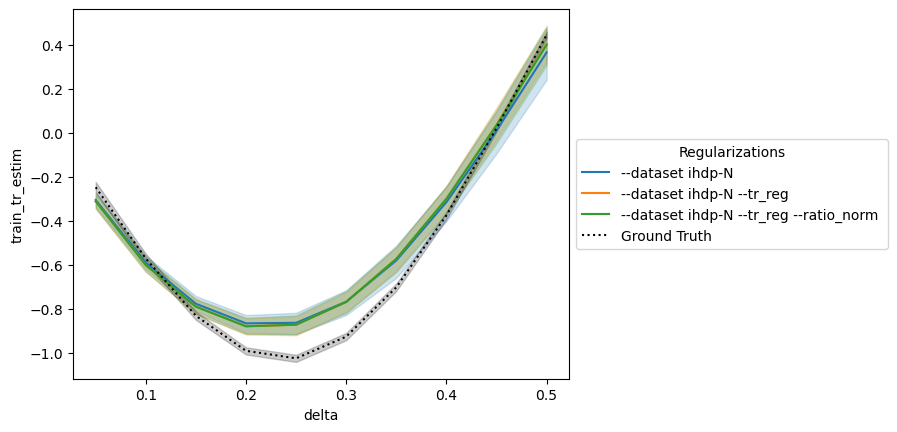

========== sim-N-train =========
(600, 19)


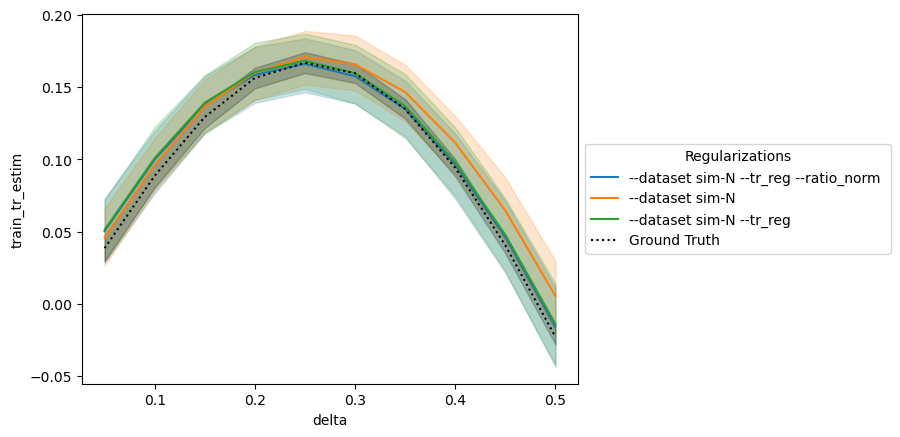

========== news-N-train =========
(600, 19)


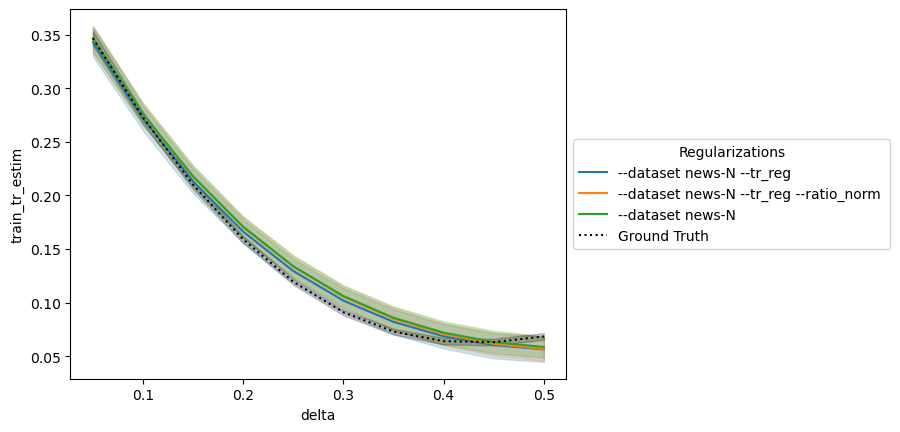

========== ihdp-N-test =========
(600, 19)


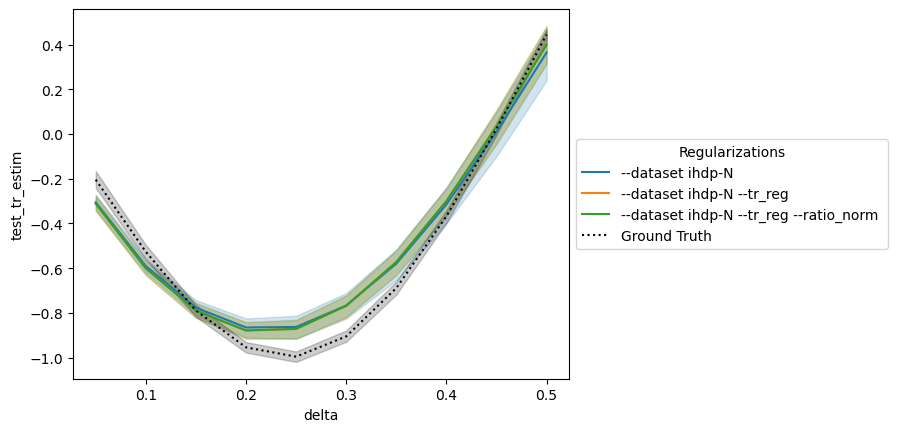

========== sim-N-test =========
(600, 19)


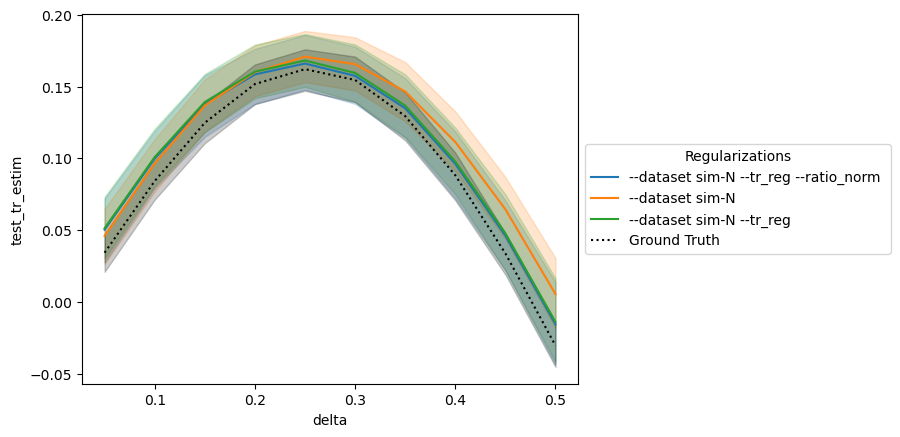

========== news-N-test =========
(600, 19)


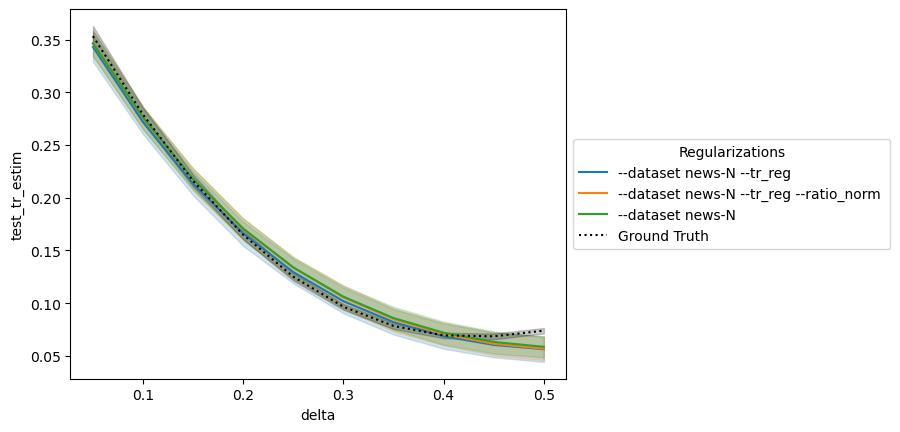

In [308]:

for part in ("train", "test"):
    for dset in datasets:
        print(f"========== {dset}-{part} =========")
        D = curves[(curves.dataset == dset) & (curves.part == part)].drop_duplicates(["delta", "dir", "seed"])
        D = D.fillna(0)
        truth = D[D.dir == D.dir.iloc[0]][["delta", f"{part}_truth"]]
        print(D.shape)
        sns.lineplot(x="delta", y=f"{part}_tr_estim", hue="dir", data=D, legend=True)
        # sns.lineplot(x="delta", y=f"{part}_aipw_estim", hue="dir", data=D, legend=True, ls="--")
        sns.lineplot(x="delta", y=f"{part}_truth", label="Ground Truth", c="black", ls=":", data=D, legend=True)
        plt.legend(title='Regularizations', loc='center left', bbox_to_anchor=(1, 0.5))
    
        plt.show()